# ECON 441B - Assignment #8

# Pregya Vijayakumar

# 0.) Import and Clean data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_excel('bank-additional-full.xlsx')

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df = df.drop(["default", "pdays",	"previous",	"poutcome",	"emp.var.rate",	"cons.price.idx",	"cons.conf.idx",	"euribor3m",	"nr.employed"], axis = 1)
df = pd.get_dummies(df, columns = ["loan", "job","marital","housing","contact","day_of_week", "campaign", "month", "education"],drop_first = True)

In [6]:
df.head()

,age,duration,y,loan_unknown,loan_yes,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_nov,month_oct,month_sep,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,56,261,no,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,57,149,no,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,37,226,no,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,40,151,no,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,56,307,no,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [7]:
y = pd.get_dummies(df["y"], drop_first = True)
X = df.drop(["y"], axis = 1)

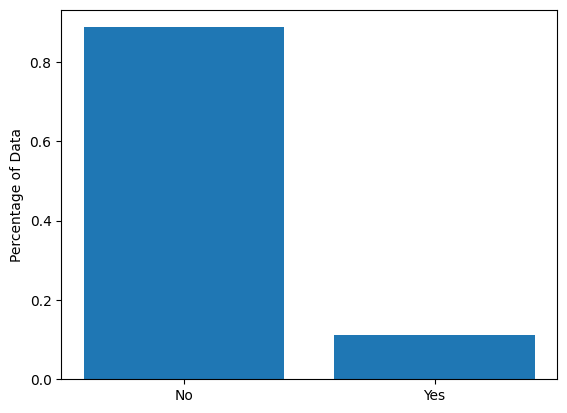

In [8]:
obs = len(y)
plt.bar(["No","Yes"],[len(y[y.yes==0])/obs,len(y[y.yes==1])/obs])
plt.ylabel("Percentage of Data")
plt.show()

In [9]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler().fit(X_train)

X_scaled = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

#1.) Based on the visualization above, use your expert opinion to transform the data based on what we learned this quarter

In [11]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
smote_X, smote_Y = smote.fit_resample(X_scaled, y_train)

# 2.) Build and visualize a decision tree of Max Depth 3. Show the confusion matrix.

In [12]:
d_tree = DecisionTreeClassifier(max_depth = 3)
d_tree.fit(smote_X, smote_Y)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'duration <= -0.161\ngini = 0.5\nsamples = 51160\nvalue = [25580, 25580]\nclass = No'),
 Text(0.25, 0.625, 'duration <= -0.464\ngini = 0.297\nsamples = 20059\nvalue = [16415, 3644]\nclass = No'),
 Text(0.125, 0.375, 'month_mar <= 4.161\ngini = 0.128\nsamples = 11371\nvalue = [10587, 784]\nclass = No'),
 Text(0.0625, 0.125, 'gini = 0.111\nsamples = 11146\nvalue = [10486, 660]\nclass = No'),
 Text(0.1875, 0.125, 'gini = 0.495\nsamples = 225\nvalue = [101, 124]\nclass = Yes'),
 Text(0.375, 0.375, 'contact_telephone <= 1.313\ngini = 0.442\nsamples = 8688\nvalue = [5828, 2860]\nclass = No'),
 Text(0.3125, 0.125, 'gini = 0.492\nsamples = 6335\nvalue = [3562.0, 2773.0]\nclass = No'),
 Text(0.4375, 0.125, 'gini = 0.071\nsamples = 2353\nvalue = [2266, 87]\nclass = No'),
 Text(0.75, 0.625, 'contact_telephone <= 1.322\ngini = 0.416\nsamples = 31101\nvalue = [9165, 21936]\nclass = Yes'),
 Text(0.625, 0.375, 'duration <= 0.712\ngini = 0.336\nsamples = 25593\nvalue = [5467, 20126]\

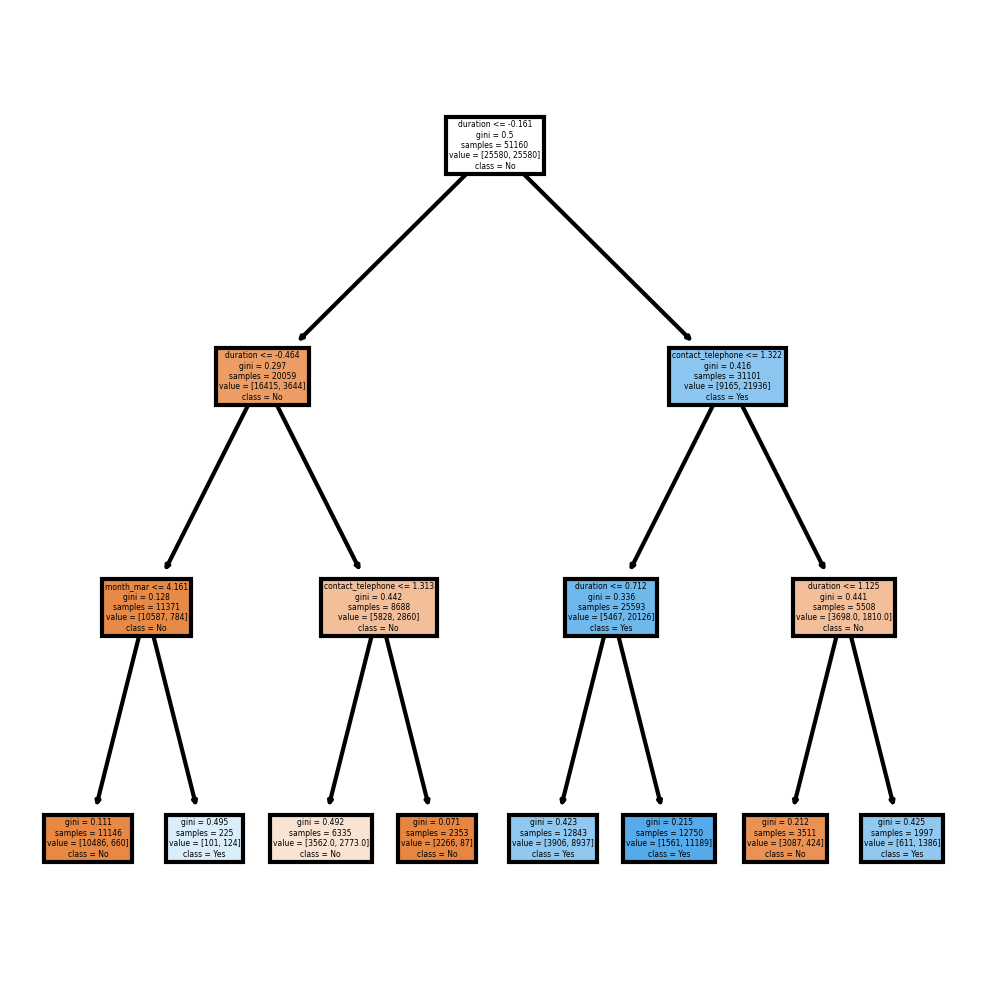

In [13]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
plot_tree(d_tree, filled = True, feature_names = X.columns, class_names=["No","Yes"])


#fig.savefig('imagename.png')

# 1b.) Confusion matrix on out of sample data. Visualize and store as variable

In [14]:
y_pred = d_tree.predict(X_test)
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

In [15]:
# printing the confusion matrix because it wont present the values in the figure
print(cm_raw)

[[8300 2668]
 [ 331 1058]]


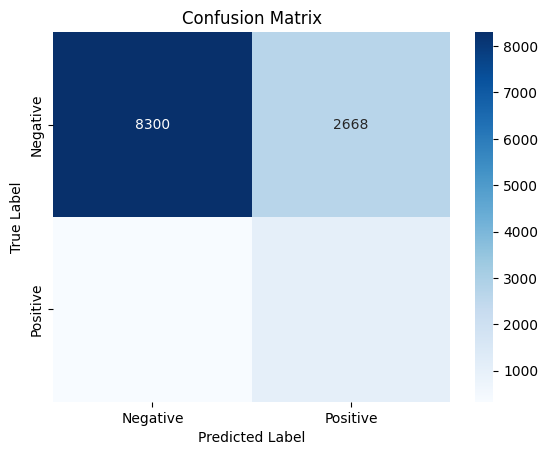

In [16]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 3.) Use bagging on your descision tree

In [17]:
dtree = DecisionTreeClassifier(max_depth = 3)

In [18]:
bagging = BaggingClassifier(estimator = dtree,
                 n_estimators =100,
                 max_samples = .5,
                 max_features = 1.
                 )
bagging.fit(smote_X, smote_Y)

y_pred = bagging.predict(X_test)

In [19]:
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

In [20]:
# printing the confusion matrix because it wont present the values in the figure
print(cm_raw)

[[8220 2748]
 [ 317 1072]]


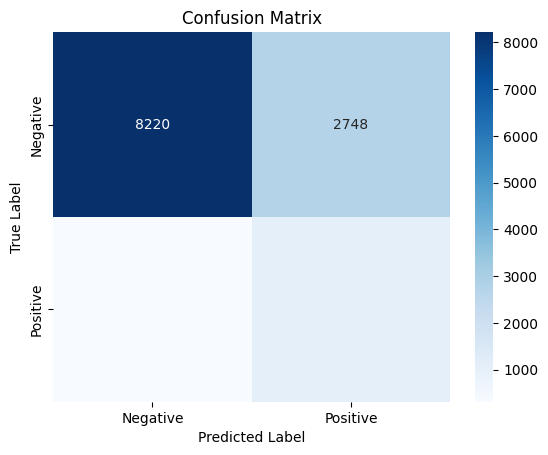

In [21]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 4.) Boost your tree

In [22]:
from sklearn.ensemble import AdaBoostClassifier

In [23]:
dtree = DecisionTreeClassifier(max_depth = 3)

In [24]:
boost = AdaBoostClassifier(estimator = dtree,
                 n_estimators =100
                 )
boost.fit(smote_X, smote_Y)

y_pred = boost.predict(X_test)

In [25]:
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

In [26]:
# printing the confusion matrix because it wont present the values in the figure
print(cm_raw)

[[10431   537]
 [  763   626]]


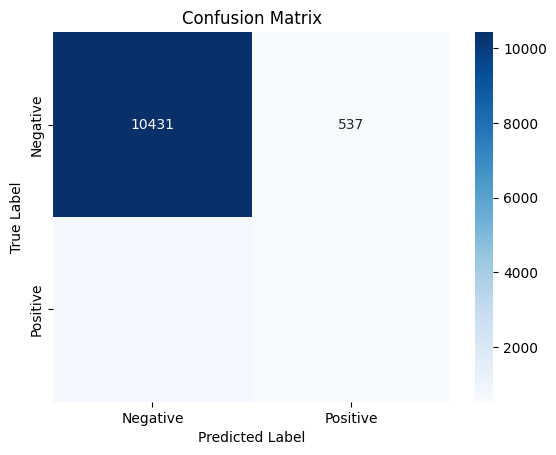

In [27]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 5.) Create a superlearner with at least 4 base learner models. Use a logistic reg for your metalearner. Interpret your coefficients and save your CM.

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [29]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(smote_X, smote_Y)

y_pred = knn.predict(X_test)

In [30]:
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

In [31]:
# printing the confusion matrix because it wont present the values in the figure
print(cm_raw)

[[8981 1987]
 [ 537  852]]


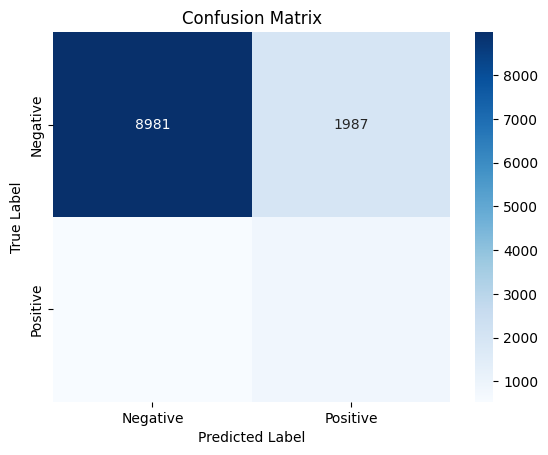

In [32]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [33]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(smote_X, smote_Y)

y_pred = rf.predict(X_test)

In [34]:
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

In [35]:
# printing the confusion matrix because it wont present the values in the figure
print(cm_raw)

[[10453   515]
 [  801   588]]


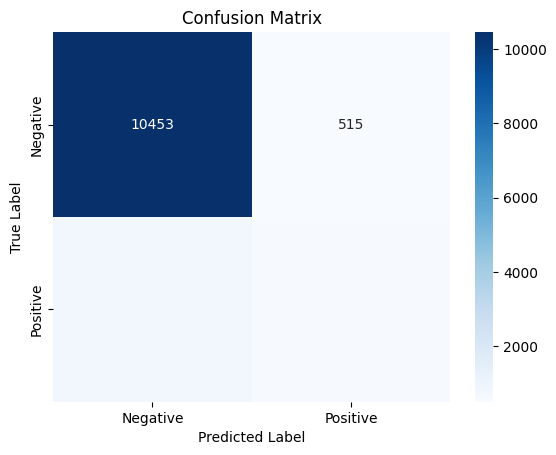

In [36]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [37]:
from collections.abc import Sequence

In [38]:
b_predictions = [list(d_tree.predict(smote_X).astype(float)), 
                 list(bagging.predict(smote_X).astype(float)), 
                 list(boost.predict(smote_X).astype(float)), 
                list(knn.predict(smote_X).astype(float)),
                 list(rf.predict(smote_X).astype(float))]

In [39]:
b_predictions_transporse = np.array(b_predictions).transpose()

In [40]:
super_learner = LogisticRegression()

In [41]:
super_learner.fit(b_predictions_transporse, smote_Y)
super_learner.coef_

array([[ 0.19516027,  0.23046272,  1.77163157,  1.92509242, 12.57364839]])

From the array we get after using a logistic regression for the metalearner, it assigns the following weights - 
#### 1. Decision Tree - 0.19516027
#### 2. Bagging - 0.23046272
#### 3. Boosting -1.77163157
#### 4. KNN - 1.92509242
#### 5. Random Forest -12.57364839


We can see that the the Random Forest model received the highest coefficient indicating that it is the most influential when making predictions compared to the other 4. Whereas the weights of Decision Tree and Bagging are really small and similar, stating their influence  in making predictions is at a relatively lower level compared to the Boosting and KNN. 